In [21]:
from os import listdir
from pickle import dump
import keras
# from keras.applications.vgg16 import VGG16
# from keras.preprocessing.image import load_img
from tensorflow.keras.utils import load_img
# from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
# from keras.applications import  resnet50
# from keras.applications import resnet
# from tensorflow.python.keras.applications.resnet import ResNet50 as resnet50
from tensorflow.keras.applications import ResNet50
# from keras.applications.vgg16 import preprocess_input
from keras.applications.resnet import preprocess_input
from keras.models import Model
import os
from PIL import Image
import pandas as pd

import tqdm
import matplotlib.pyplot as plt
import random 
import tensorflow
import numpy.core.multiarray
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D


from keras.models import load_model

import sklearn
import subprocess
import time
# import PIL
c_folder = None
# import dlib


In [22]:
lista_images_train_NORMAL = list()
lista_labels_train_NORMAL = list()

main_folder = 'C:\\Users\\Rodrigo Araujo\\Documents\\Mestrado - UFBA\\Disciplinas\\Inteligência Computacional\\trabalho\\archive\\chest_xray\\train\\NORMAL\\'
pastas = os.listdir(main_folder)
for i  in range(len(pastas)):
    image  = load_img(main_folder +str(pastas[i]),target_size=(224,224))
    lista_images_train_NORMAL.append(image)
    lista_labels_train_NORMAL.append(pastas[i])

In [23]:
lista_images_train_PNEUMONIA = list()
lista_labels_train_PNEUMONIA = list()

main_folder = 'C:\\Users\\Rodrigo Araujo\\Documents\\Mestrado - UFBA\\Disciplinas\\Inteligência Computacional\\trabalho\\archive\\chest_xray\\train\\PNEUMONIA\\'
pastas = os.listdir(main_folder)
for i  in range(len(pastas)):
    image  = load_img(main_folder +str(pastas[i]),target_size=(224,224))
    lista_images_train_PNEUMONIA.append(image)
    lista_labels_train_PNEUMONIA.append(pastas[i])

In [4]:
lista_images_test_NORMAL = list()
lista_labels_test_NORMAL = list()

main_folder = 'C:\\Users\\Rodrigo Araujo\\Documents\\Mestrado - UFBA\\Disciplinas\\Inteligência Computacional\\trabalho\\archive\\chest_xray\\test\\NORMAL\\'
pastas = os.listdir(main_folder)
for i  in range(len(pastas)):
    image  = load_img(main_folder +str(pastas[i]),target_size=(224,224))
    lista_images_test_NORMAL.append(image)
    lista_labels_test_NORMAL.append(pastas[i])

In [5]:
lista_images_test_PNEUMONIA = list()
lista_labels_test_PNEUMONIA = list()

main_folder = 'C:\\Users\\Rodrigo Araujo\\Documents\\Mestrado - UFBA\\Disciplinas\\Inteligência Computacional\\trabalho\\archive\\chest_xray\\test\\PNEUMONIA\\'
pastas = os.listdir(main_folder)
for i  in range(len(pastas)):
    image  = load_img(main_folder +str(pastas[i]),target_size=(224,224))
    lista_images_test_PNEUMONIA.append(image)
    lista_labels_test_PNEUMONIA.append(pastas[i])

In [6]:
lista_images_val_NORMAL = list()
lista_labels_val_NORMAL = list()

main_folder = 'C:\\Users\\Rodrigo Araujo\\Documents\\Mestrado - UFBA\\Disciplinas\\Inteligência Computacional\\trabalho\\archive\\chest_xray\\val\\NORMAL\\'
pastas = os.listdir(main_folder)
for i  in range(len(pastas)):
    image  = load_img(main_folder +str(pastas[i]),target_size=(224,224))
    lista_images_val_NORMAL.append(image)
    lista_labels_val_NORMAL.append(pastas[i])

In [7]:
lista_images_val_PNEUMONIA = list()
lista_labels_val_PNEUMONIA = list()

main_folder = 'C:\\Users\\Rodrigo Araujo\\Documents\\Mestrado - UFBA\\Disciplinas\\Inteligência Computacional\\trabalho\\archive\\chest_xray\\val\\PNEUMONIA\\'
pastas = os.listdir(main_folder)
for i  in range(len(pastas)):
    image  = load_img(main_folder +str(pastas[i]),target_size=(224,224))
    lista_images_val_PNEUMONIA.append(image)
    lista_labels_val_PNEUMONIA.append(pastas[i])

In [24]:
lista_labels_train_NORMAL[0]

'IM-0115-0001.jpeg'

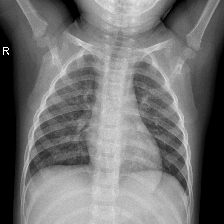

In [29]:
lista_images_train_NORMAL[65]

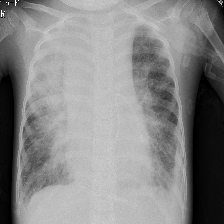

In [30]:
lista_images_train_PNEUMONIA[30]

In [11]:
model_resnet = ResNet50(weights='imagenet')
#Modify model to remove the last layer
model_resnet.layers.pop()
model_resnet = Model(inputs=model_resnet.inputs,outputs=model_resnet.layers[-1].output)
print(model_resnet.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [12]:
lista_vetores_extraidos = list()

for i in range(len(lista_images_train_NORMAL)):
    if(i%100==0):
        print(i)
    image = lista_images_train_NORMAL[i]
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    result = model_resnet.predict(image, verbose=0)[0]
    lista_vetores_extraidos.append(result)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300


In [13]:
data = pd.DataFrame(lista_vetores_extraidos)
data.to_csv('data/features_train_NORMAL.csv', index=False)

In [14]:
data_full = pd.read_csv('data/features_train_NORMAL.csv') 

In [15]:
data_full.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,8.030253e-07,0.000009,0.000017,0.000724,0.000036,1.137662e-06,7.585679e-06,1.365604e-07,4.690241e-07,3.792116e-07,...,3.977842e-07,1.843780e-07,2.469885e-08,8.963966e-09,1.305061e-07,1.066745e-07,6.338824e-07,1.134629e-08,0.000153,0.000870
1,8.543582e-06,0.000136,0.000035,0.002230,0.000114,4.040247e-06,1.052312e-05,4.133533e-05,4.052147e-06,2.338420e-06,...,1.463699e-06,4.915610e-07,3.352001e-07,9.594637e-08,3.922321e-06,1.910834e-06,3.039644e-05,7.112688e-08,0.000108,0.000347
2,4.860348e-07,0.000003,0.000031,0.001357,0.000041,2.204841e-07,3.746792e-07,6.930670e-08,4.367935e-08,6.756602e-08,...,1.171786e-07,6.659896e-09,3.649183e-09,2.374704e-09,2.867081e-08,4.006484e-08,7.181430e-07,6.823269e-09,0.000023,0.000030
3,1.596785e-06,0.000008,0.000004,0.000374,0.000020,4.659951e-08,5.733667e-07,7.739556e-08,7.139975e-08,3.411960e-08,...,6.221602e-08,5.327104e-09,1.708283e-08,7.948706e-10,2.329523e-08,1.155800e-08,3.170211e-07,1.690163e-08,0.000148,0.002563
4,3.259233e-06,0.000032,0.000062,0.006291,0.000078,8.776717e-07,5.650817e-06,2.229028e-05,6.193986e-06,1.380488e-06,...,2.914699e-07,1.114175e-06,5.342975e-07,9.735795e-08,1.374624e-06,4.399171e-07,2.088362e-05,8.871561e-08,0.000017,0.000270


In [16]:
lista_vetores_extraidos = list()

for i in range(len(lista_images_train_PNEUMONIA)):
    if(i%100==0):
        print(i)
    image = lista_images_train_PNEUMONIA[i]
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    result = model_resnet.predict(image, verbose=0)[0]
    lista_vetores_extraidos.append(result)

data = pd.DataFrame(lista_vetores_extraidos)
data.to_csv('data/features_train_PNEUMONIA.csv', index=False)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800


In [17]:
lista_vetores_extraidos = list()

for i in range(len(lista_images_test_NORMAL)):
    if(i%100==0):
        print(i)
    image = lista_images_test_NORMAL[i]
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    result = model_resnet.predict(image, verbose=0)[0]
    lista_vetores_extraidos.append(result)

data = pd.DataFrame(lista_vetores_extraidos)
data.to_csv('data/features_test_NORMAL.csv', index=False)

0
100
200


In [18]:
lista_vetores_extraidos = list()

for i in range(len(lista_images_test_PNEUMONIA)):
    if(i%100==0):
        print(i)
    image = lista_images_test_PNEUMONIA[i]
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    result = model_resnet.predict(image, verbose=0)[0]
    lista_vetores_extraidos.append(result)

data = pd.DataFrame(lista_vetores_extraidos)
data.to_csv('data/features_test_PNEUMONIA.csv', index=False)

0
100
200
300


In [19]:
lista_vetores_extraidos = list()

for i in range(len(lista_images_val_NORMAL)):
    if(i%100==0):
        print(i)
    image = lista_images_val_NORMAL[i]
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    result = model_resnet.predict(image, verbose=0)[0]
    lista_vetores_extraidos.append(result)

data = pd.DataFrame(lista_vetores_extraidos)
data.to_csv('data/features_val_NORMAL.csv', index=False)

0


In [20]:
lista_vetores_extraidos = list()

for i in range(len(lista_images_val_PNEUMONIA)):
    if(i%100==0):
        print(i)
    image = lista_images_val_PNEUMONIA[i]
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    result = model_resnet.predict(image, verbose=0)[0]
    lista_vetores_extraidos.append(result)

data = pd.DataFrame(lista_vetores_extraidos)
data.to_csv('data/features_val_PNEUMONIA.csv', index=False)

0
